## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2

In [18]:
params = {'user' : 'lhl_student',
          'password' : 'lhl_student',
          'host' : 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com',
          'port' : '5432',
          'database' : 'mid_term_project'
         }

def open_connection(params):
    try:
        connection = psycopg2.connect(**params)
        cursor = connection.cursor()
        print("Connection was successful")
    except psycopg2.Error as e:
        print(f"The following error '{e}' occurred.")
        
    return connection, cursor
open_connection(params)

Connection was successful


(<connection object at 0x000001F605268708; dsn: 'user=lhl_student password=xxx dbname=mid_term_project host=mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com port=5432', closed: 0>,
 <cursor object at 0x000001F605B61AC8; closed: 0>)

In [19]:
connection, cursor = open_connection(params)

query1 = 'SELECT * FROM flights LIMIT 1500;'
query2 = "SELECT column_name FROM information_schema.columns WHERE TABLE_NAME = 'flights';"

cursor.execute(query1)
data = cursor.fetchall()

cursor.execute(query2)
columns = cursor.fetchall()

connection.close()

Connection was successful


In [20]:
columns = [col[0] for col in columns]
columns

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name']

In [21]:
df = pd.DataFrame(data, columns=columns)
df.dropna(subset=['arr_delay'], inplace=True)
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-25,AA,AA_CODESHARE,AA,4232,MQ,N822AE,4232,12478,JFK,...,427.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-12-25,AA,AA_CODESHARE,AA,4233,MQ,N618AE,4233,12451,JAX,...,335.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-12-25,AA,AA_CODESHARE,AA,4233,MQ,N618AE,4233,13303,MIA,...,335.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2019-12-25,AA,AA_CODESHARE,AA,4234,MQ,N610AE,4234,12451,JAX,...,335.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2019-12-25,AA,AA_CODESHARE,AA,4234,MQ,N610AE,4234,13303,MIA,...,335.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2019-12-25,AA,AA_CODESHARE,AA,3152,OO,N750SK,3152,12892,LAX,...,748.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1496,2019-12-25,AA,AA_CODESHARE,AA,3156,OO,N758SK,3156,10372,ASE,...,1013.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1497,2019-12-25,AA,AA_CODESHARE,AA,3156,OO,N758SK,3156,13930,ORD,...,1013.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1498,2019-12-25,AA,AA_CODESHARE,AA,3159,OO,N753EV,3159,10140,ABQ,...,1118.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [22]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

In [34]:
df['arr_delay'][df['arr_delay']> 150]

519     180.0
529     199.0
530     175.0
774     301.0
1016    297.0
1023    190.0
1024    171.0
1219    153.0
1302    294.0
1330    286.0
1388    901.0
Name: arr_delay, dtype: float64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

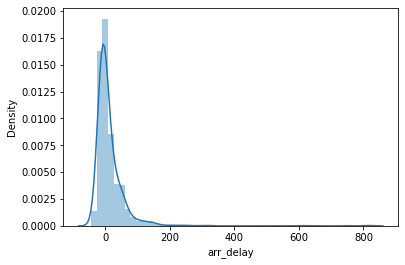

In [9]:
sns.distplot(df['arr_delay'])

In [36]:
stat,p = stats.shapiro(df['arr_delay'][df['arr_delay'] < 150])
stat, p

(0.7910046577453613, 8.986064623221825e-40)

In [42]:
stats.trim_mean(df['arr_delay'], 0.20)

-12.509604519774012

### ^^^ The Distribution is not normal (without outliers)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [43]:
connection,cursor = open_connection(params)
print('working...')

months = []
i='00'
for mon in range(1,13):
    if mon < 10:
        i = '0' + str(mon)
    else:
        i = str(mon)
    query = f'''
    SELECT arr_delay FROM flights 
    WHERE fl_date LIKE '____-{i}%'
    ORDER BY random()
    LIMIT 300;
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    data = [i[0] for i in data] # unpack the response tuples
    month = pd.Series(data)
    months.append(pd.DataFrame(month))
    
connection.close()
print("Connection closed, operation completed")

Connection was successful


C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

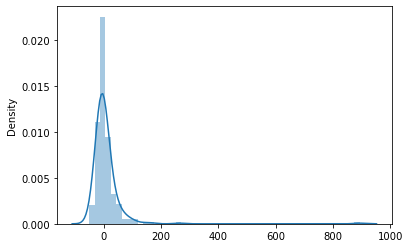

In [45]:
sns.distplot(months[1])

In [54]:
for i in range(12):
    print('month', i, 'mean:', *stats.trim_mean(months[i], 0.20))
    
for i in range(12):
    print('month', i, 'median', np.median(stats.trimboth(months[i], 0.20)))

month 0 mean: -5.066666666666666
month 1 mean: -2.6444444444444444
month 2 mean: -4.605555555555555
month 3 mean: -4.955555555555556
month 4 mean: -3.438888888888889
month 5 mean: -1.4944444444444445
month 6 mean: -0.17222222222222222
month 7 mean: -1.1888888888888889
month 8 mean: -7.911111111111111
month 9 mean: -4.477777777777778
month 10 mean: -5.5055555555555555
month 11 mean: -3.8944444444444444
month 0 median -6.0
month 1 median -4.0
month 2 median -6.0
month 3 median -7.0
month 4 median -5.0
month 5 median -3.0
month 6 median -2.5
month 7 median -4.0
month 8 median -9.5
month 9 median -6.0
month 10 median -6.0
month 11 median -6.0


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [3]:
import os
API_key = os.environ.get('WWO_API_key')

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?